Mean squared error: 77970.7581368529
Root mean squared error: 279.23244463502607
R2 score: 0.7918441372970111

Cross-Validation Scores: [0.86781591 0.97719595 0.99176192 0.83155865 0.97536245 0.98079297
 0.99018308 0.81442873 0.86466433 0.96243009]

Average Cross-Validation Score: 0.9256194075456639


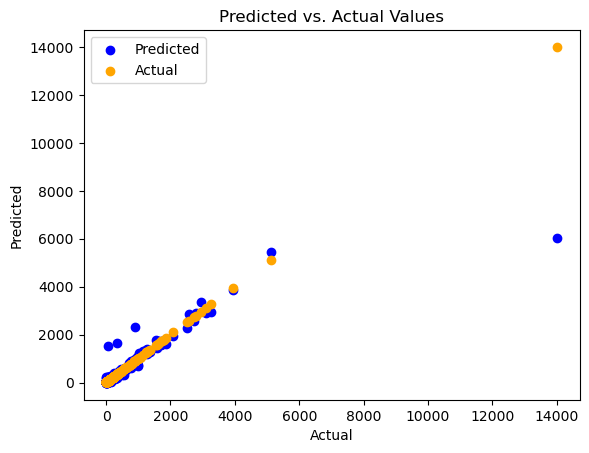

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Load data from CSV file
data = pd.read_csv("cancer_reg_updated.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Separate features and target variable
X = data.drop(['avgDeathsPerYear'], axis=1)
y = data['avgDeathsPerYear']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a BRT model with learning rate of 0.1, maximum depth of 5, and 100 trees
brt = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)

k = 10
cv_scores = cross_val_score(brt, X, y, cv=k)


# Fit the BRT model to the training data
brt.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = brt.predict(X_test)

# Print the mean squared error, root mean squared error, mean absolute error, and R2 score of the BRT model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())


# Scatterplot for the predicted vs. actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()
